### The first part is taken from Yunhe's HW4 assignment 2, revised according to the reviews from Haoming & Dr. Bianco. 
## This is the start of first part

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
#download 201503data from citibike
!curl https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip > 201502-citibike-tripdata.zip
#download 201508data from citibike
!curl https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip > 201508-citibike-tripdata.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  15.8M      0 --:--:-- --:--:-- --:--:-- 15.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.2M  100 36.2M    0     0  38.7M      0 --:--:-- --:--:-- --:--:-- 38.7M


In [3]:
#move the download data to PUI data (folder)
print ("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/yc3420/PUIdata


In [4]:
!mv 201502-citibike-tripdata.zip $PUIDATA
!mv 201508-citibike-tripdata.zip $PUIDATA


In [5]:
!ls $PUIDATA

1p				      drinking_water_quaity.csv  rows.csv
201502-citibike-tripdata.csv	      GCT2801.csv		 solution3.csv
201502-citibike-tripdata.zip	      linkNYClocations.csv	 solution6.csv
201503-citibike-tripdata.csv	      nyc_pluto_18v1.zip	 solution.csv
201503-citibike-tripdata.zip	      Parks.csv			 time.csv
201508-citibike-tripdata.csv	      parkToPuma.csv		 ZIP
201508-citibike-tripdata.zip	      PLUTO_for_WEB		 ZIPCODE.gz
ACS_16_1YR_GCT2801.ST50_with_ann.csv  PUMA
borough.csv			      PUMA.gz


In [6]:
#unzip the data
os.system("unzip " + os.getenv("PUIDATA") + "/" + "201502" + "-citibike-tripdata.zip")
os.system("mv " + "201502" + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
ctb1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "201502" + '-citibike-tripdata.csv')


!ls $PUIDATA



1p				      drinking_water_quaity.csv  rows.csv
201502-citibike-tripdata.csv	      GCT2801.csv		 solution3.csv
201502-citibike-tripdata.zip	      linkNYClocations.csv	 solution6.csv
201503-citibike-tripdata.csv	      nyc_pluto_18v1.zip	 solution.csv
201503-citibike-tripdata.zip	      Parks.csv			 time.csv
201508-citibike-tripdata.csv	      parkToPuma.csv		 ZIP
201508-citibike-tripdata.zip	      PLUTO_for_WEB		 ZIPCODE.gz
ACS_16_1YR_GCT2801.ST50_with_ann.csv  PUMA
borough.csv			      PUMA.gz


In [7]:
os.system("unzip " + os.getenv("PUIDATA") + "/" + "201508" + "-citibike-tripdata.zip")
os.system("mv " + "201508" + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
ctb2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "201508" + '-citibike-tripdata.csv')




In [8]:
shape(ctb2)

(1179044, 15)

In [9]:
shape(ctb1)

(196930, 15)

## Idea: generally, women are more likely to riding longer than man in a single trip during the week
## Null Hypothesis:  the average time of women biking during the week is the same or less than man biking 
## Alternative Hypothesis: the average time of women biking during week is higher than man biking 
$H_0$ : ${Wavgtime} <= {Mavgtime}$   

$H_a$ : ${Wavgtime} > {Mavgtime}$  
  
significance level $\alpha=0.05$

## 'W' stand for women, 'M' stand for men. Sub 'avg' stand for the average time of riding during the week
**(This is from Haoming's suggestion)**

In [10]:
frames = [ctb1, ctb2]
ctb = pd.concat(frames)

In [11]:
#
ctb['date'] = pd.to_datetime(ctb['starttime'])
ctb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [12]:
ctb = ctb.reset_index()

In [13]:
ctb.tail()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
1375969,1179039,423,8/31/2015 23:58:43,9/1/2015 00:05:47,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,18686,Subscriber,1988.0,1,2015-08-31 23:58:43
1375970,1179040,1021,8/31/2015 23:58:54,9/1/2015 00:15:56,518,E 39 St & 2 Ave,40.747804,-73.973442,348,W Broadway & Spring St,40.724910,-74.001547,23487,Subscriber,1970.0,1,2015-08-31 23:58:54
1375971,1179041,1896,8/31/2015 23:59:11,9/1/2015 00:30:47,336,Sullivan St & Washington Sq,40.730477,-73.999061,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,23509,Subscriber,1982.0,1,2015-08-31 23:59:11
1375972,1179042,826,8/31/2015 23:59:16,9/1/2015 00:13:02,3075,Division Ave & Marcy Ave,40.707087,-73.957968,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,15405,Customer,NaN,0,2015-08-31 23:59:16
1375973,1179043,105,8/31/2015 23:59:41,9/1/2015 00:01:26,476,E 31 St & 3 Ave,40.743943,-73.979661,546,E 30 St & Park Ave S,40.744449,-73.983035,23947,Subscriber,1975.0,1,2015-08-31 23:59:41


In [14]:
ctb.columns

Index([u'index', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [15]:
ctb.drop([ 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year','index'], axis=1, inplace=True)

In [16]:
ctb.head()

,tripduration,gender,date
0,801,2,2015-02-01 00:00:00
1,379,1,2015-02-01 00:00:00
2,2474,2,2015-02-01 00:01:00
3,818,2,2015-02-01 00:01:00
4,544,1,2015-02-01 00:01:00


### Figure 1a. Distribution of single ride time length by gender in March 2015, absolute values

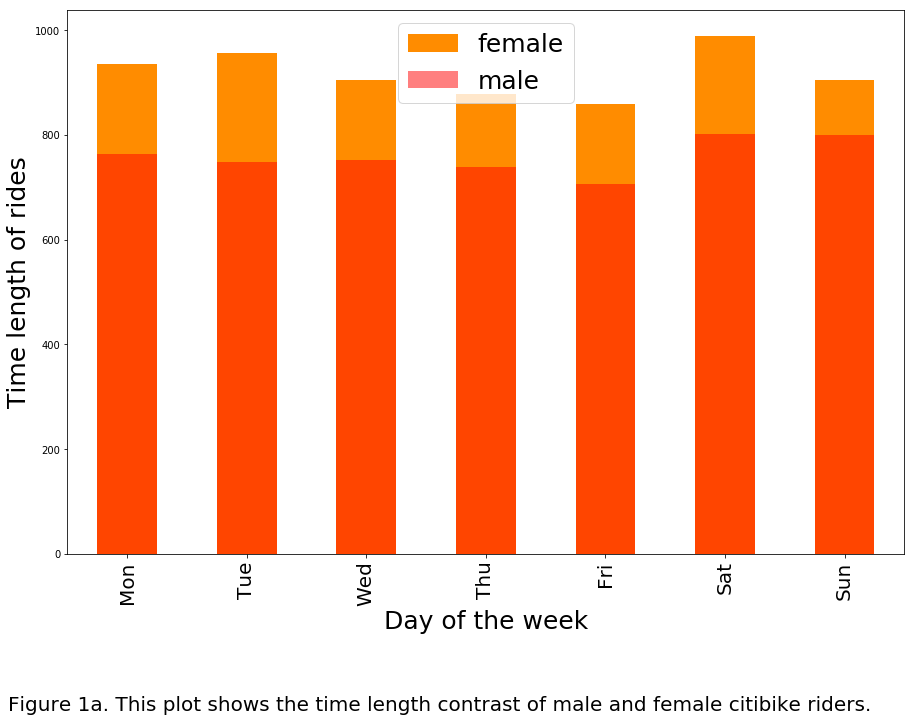

In [17]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_w = 1
axis = ((ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()) / norm_w).plot(kind="bar",color='DarkOrange', label='female')

norm_m = 1
axis = ((ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()) / norm_m).plot(kind="bar",color='Red', alpha=0.5,label='male')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1a. This plot shows the time length contrast of male and female citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

## Here we add two bar charts for male and female riders separately. Incorporate with Haoming's advise.

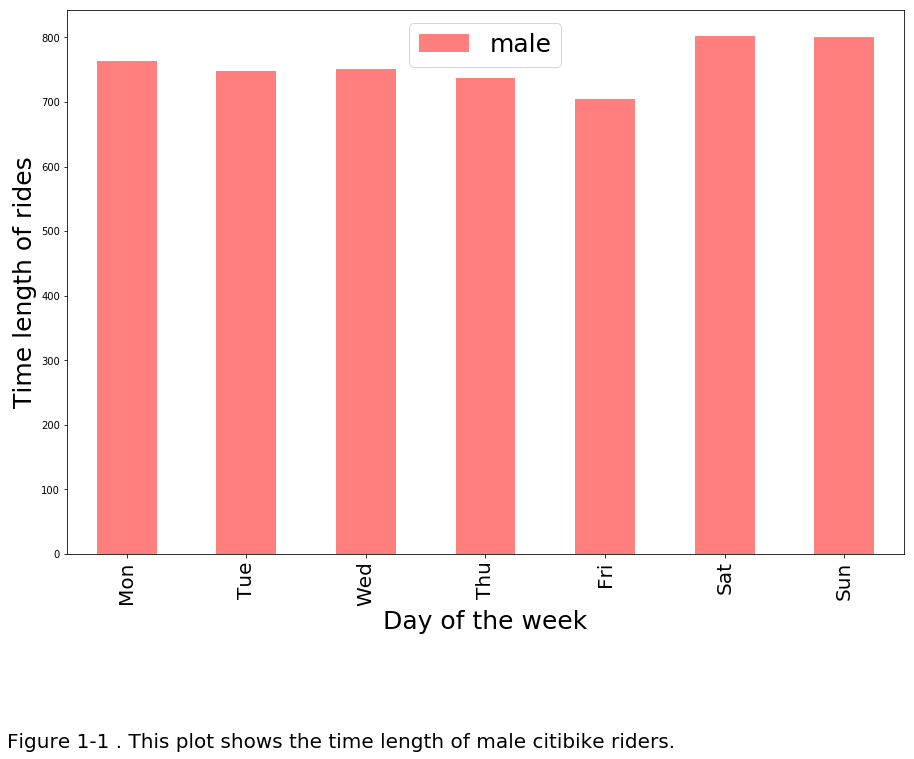

In [18]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_m = 1
axis = ((ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()) / norm_m).plot(kind="bar",color='Red', alpha=0.5,label='male')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1-1 . This plot shows the time length of male citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

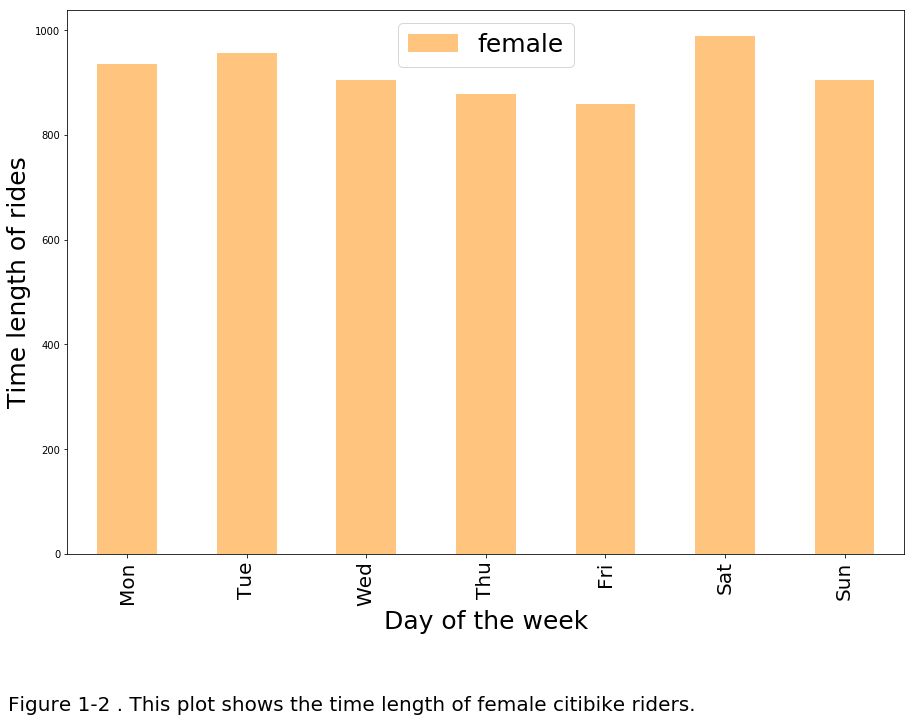

In [19]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_w = 1
axis = ((ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()) / norm_w).plot(kind="bar",color='DarkOrange', alpha=0.5,label='female')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1-2 . This plot shows the time length of female citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

### Figure 1b. Distribution of single ride time length by gender in March 2015, absolute values, WITH stat errors
#### the distribution in this situation follows a Poisson distribution

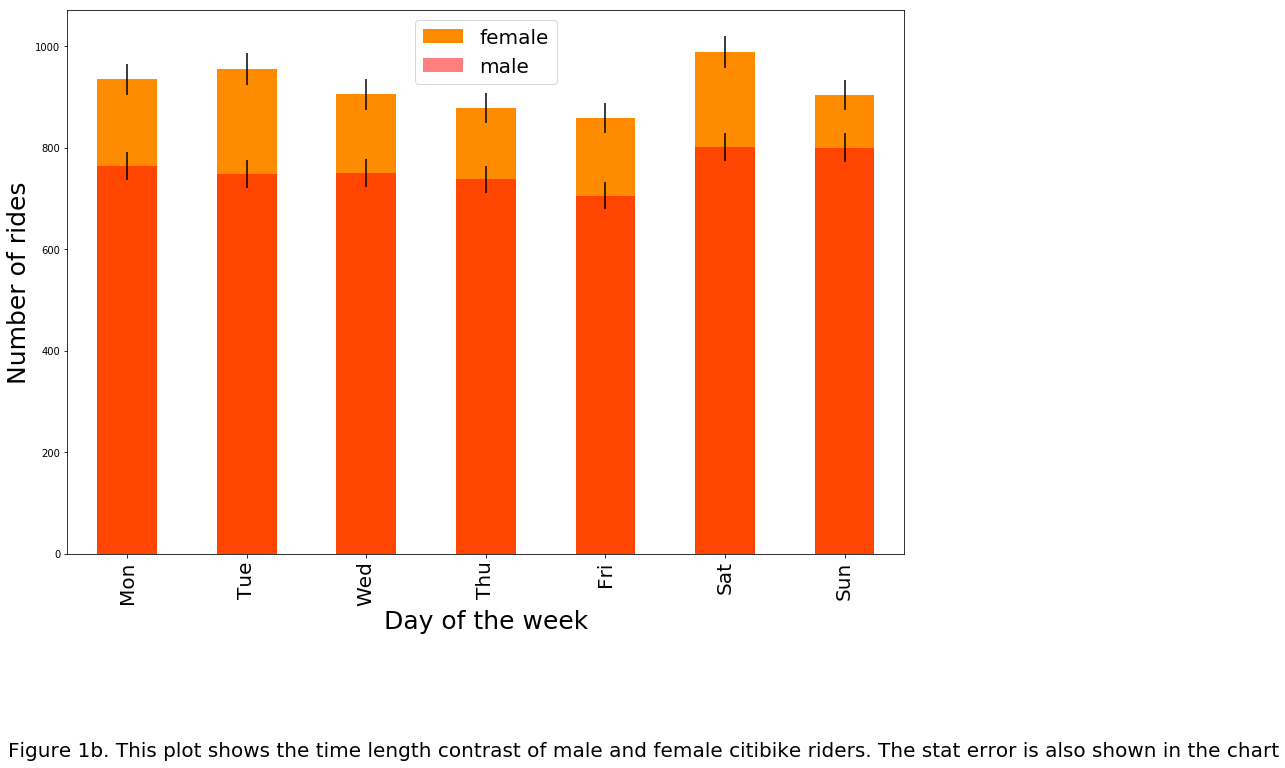

In [20]:
fig=pl.figure(figsize(15,10))


mean_w = ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()
norm_w = 1
error_w = np.sqrt(mean_w)
axis=((mean_w) / norm_w).plot(kind="bar",color='DarkOrange',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


mean_m = ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()
norm_m = 1
error_m=np.sqrt(mean_m)
((mean_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='Red', label='men bikers')


axis.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
axis.set_ylabel ("Number of rides")
axis.set_xlabel ("Day of the week")
pl.legend(['female','male'],fontsize=20)
text2 = 'Figure 1b. This plot shows the time length contrast of male and female citibike riders. The stat error is also shown in the chart'
pl.text(-1,-400,text2,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Number of rides', fontsize = 25)

## This is the end of first part

## This the the start of the second part
## This part follows the instruction given by Dr. Bianco in github
  
## Here I will conduct z-test for this question.  The reason is that since there are two samples and we do not know the population variance. Therefore, we could choose from t or z. However, the sample size is larger than 30 which indicate t-test might not be appropriate for this question. 

In [21]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s


In [22]:
counts_w = ctb.date[ctb.gender == 2].count()
counts_m = ctb.date[ctb.gender == 1].count()
pw = counts_w / len(ctb)
pm = counts_m / len(ctb)


In [23]:
sp_stdev_mw = se(p(pw, pm, counts_w, counts_m), counts_w, counts_m)
print (sp_stdev_mw)
z_fm = zscore(pw, pm, sp_stdev_mw)
print ("The z statistics is %.2f"%z_fm)

0.00109812074519
The z statistics is -405.85


**Since the abosolute value of z test is 405.85 which is larger than 1.64 (z value for p = 0.05), we could reject null hypothesis which is the average time of women biking during the week is the same or less than man biking **  


### Final conclusion: from the hypothesis testing presented above, we could say that generally, women are more likely to riding longer than man in a single trip during the week 

### Further discussions: In further researches, we could take season/year variation into consideration to remove some systematic errors. 